In [3]:
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

from astropy.table import Table
from astropy import units as u
import astropy.constants
from astropy.io import ascii,fits

from telfit import Modeler

import scipy.ndimage as scipynd
from scipy.optimize import curve_fit
from astropy import  convolution


DEIMOS_DROPBOX = '/Users/mgeha/Dropbox/DEIMOS/'


Create telluric synthetic models, binned at 0.02AA.   This choice is so that resolution is more than 10x larger than DEIMOS.

In [4]:
# RUN TELFIT SOFTWARE
# INSTALLED FROM https://github.com/freddavies/Telluric-Fitter-py3
# 
def run_telfit(h2o,o2):
    
    # DEIMOS WAVELENGTH RANGE
    wave_deimos = np.arange(6000,9500,0.02)  # DEFINE 0.01A GRID

    # HARDWIRE TO MAUNA KEA
    alt = 4.2
    lat = 19.8

    # START/END WAVELENGTH IN NM
    wavestart = 600.0
    waveend   = 950.0
       
    o2=o2*1e5
    
    #GENERATE A TELLURIC SPECTRUM -- DEFAULT RESOLUTION 0.001AA
    modeler = Modeler()
    print(h2o,o2)
    model = modeler.MakeModel(humidity=h2o,o2=o2,
                          lowfreq=1e7/waveend,
                          highfreq=1e7/wavestart, lat=lat, alt=alt)

    tell = model.toarray()

    # CONVERT TO ANGSTRUM
    wave = 10. * tell[:,0]
    flux = tell[:,1]
    
    # DETERMINE BINNING
    bins = wave - np.roll(wave,1) 
    print('binning = ',np.median(bins))
    
    
    # SMOOTH AND REBIN TO LINEAR 0.02A PIXELS
    sig_res = 0.02/np.median(bins)
    print('Kernal ',sig_res)
    gauss_kernel = convolution.Gaussian1DKernel(sig_res)
    smooth_flux  = convolution.convolve(flux, gauss_kernel)

    tell_flux = np.interp(wave_deimos,wave,smooth_flux)

    plt.plot(wave,flux)
    plt.plot(wave_deimos,tell_flux)
    plt.xlim(6900,6910)
    
    return tell_flux

In [5]:
# DEFINE 0.01A WAVELENGTH GRID
wave_deimos = np.arange(6000,9500,0.02)


In [6]:
# GRID OF PARAMETERS

# FAKE VALUES BETWEEN H2O = 38 to 44
# 44. = 45 
# 42 = 44.2 done
# 40 = 37. done
# 38 = 36.5

# COARSE GRID POINTS
#o2_grid  = np.arange(0.7, 2.1,0.1)
#h2o_grid = 1.*np.arange(5,105,5) 


# FINE GRID POINTS
o2_grid  = np.arange(0.7, 2.04,0.02)
h2o_grid = 1.*np.arange(2,102,2) 


2.0 0.7
2.0 0.72
2.0 0.74
2.0 0.76
2.0 0.78
2.0 0.8
2.0 0.8200000000000001
2.0 0.8400000000000001
2.0 0.8600000000000001
2.0 0.8800000000000001
2.0 0.9000000000000001
2.0 0.9200000000000002
2.0 0.9400000000000002
2.0 0.9600000000000002
2.0 0.9800000000000002
2.0 1.0000000000000002
2.0 1.0200000000000002
2.0 1.0400000000000003
2.0 1.0600000000000003
2.0 1.0800000000000003
2.0 1.1000000000000003
2.0 1.1200000000000003
2.0 1.1400000000000003
2.0 1.1600000000000004
2.0 1.1800000000000004
2.0 1.2000000000000004
2.0 1.2200000000000004
2.0 1.2400000000000004
2.0 1.2600000000000005
2.0 1.2800000000000005
2.0 1.3000000000000005
2.0 1.3200000000000005
2.0 1.3400000000000005
2.0 1.3600000000000005
2.0 1.3800000000000006
2.0 1.4000000000000006
2.0 1.4200000000000006
2.0 1.4400000000000006
2.0 1.4600000000000006
2.0 1.4800000000000006
2.0 1.5000000000000007
2.0 1.5200000000000007
2.0 1.5400000000000007
2.0 1.5600000000000007
2.0 1.5800000000000007
2.0 1.6000000000000008
2.0 1.6200000000000008
2.0 1

binning =  0.001635957866710669
Kernal  12.225253722586944
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_12_o2_2.02_.fits
14.0 0.7
14.0 0.72
14.0 0.74
14.0 0.76
14.0 0.78
14.0 0.8
14.0 0.8200000000000001
14.0 0.8400000000000001
14.0 0.8600000000000001
14.0 0.8800000000000001
14.0 0.9000000000000001
14.0 0.9200000000000002
14.0 0.9400000000000002
14.0 0.9600000000000002
14.0 0.9800000000000002
14.0 1.0000000000000002
14.0 1.0200000000000002
14.0 1.0400000000000003
14.0 1.0600000000000003
14.0 1.0800000000000003
14.0 1.1000000000000003
14.0 1.1200000000000003
14.0 1.1400000000000003
14.0 1.1600000000000004
14.0 1.1800000000000004
14.0 1.2000000000000004
14.0 1.2200000000000004
14.0 1.2400000000000004
14.0 1.2600000000000005
14.0 1.2800000000000005
14.0 1.3000000000000005
14.0 1.3200000000000005
14.0 1.3400000000000005
14.0 1.3600000000000005
14.0 1.3800000000000006
14.0 1.4000000000000006
14.0 1.4200000000000006
14.0 1.4400000000000006
14.0 1.4600000000000006
1

binning =  0.0016389249576604925
Kernal  12.203121263434351
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_22_o2_2.02_.fits
24.0 0.7
24.0 0.72
24.0 0.74
24.0 0.76
24.0 0.78
24.0 0.8
24.0 0.8200000000000001
24.0 0.8400000000000001
24.0 0.8600000000000001
24.0 0.8800000000000001
24.0 0.9000000000000001
24.0 0.9200000000000002
24.0 0.9400000000000002
24.0 0.9600000000000002
24.0 0.9800000000000002
24.0 1.0000000000000002
24.0 1.0200000000000002
24.0 1.0400000000000003
24.0 1.0600000000000003
24.0 1.0800000000000003
24.0 1.1000000000000003
24.0 1.1200000000000003
24.0 1.1400000000000003
24.0 1.1600000000000004
24.0 1.1800000000000004
24.0 1.2000000000000004
24.0 1.2200000000000004
24.0 1.2400000000000004
24.0 1.2600000000000005
24.0 1.2800000000000005
24.0 1.3000000000000005
24.0 1.3200000000000005
24.0 1.3400000000000005
24.0 1.3600000000000005
24.0 1.3800000000000006
24.0 1.4000000000000006
24.0 1.4200000000000006
24.0 1.4400000000000006
24.0 1.4600000000000006


binning =  0.0016460858419122815
Kernal  12.150034640213972
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_32_o2_2.02_.fits
34.0 0.7
34.0 0.72
34.0 0.74
34.0 0.76
34.0 0.78
34.0 0.8
34.0 0.8200000000000001
34.0 0.8400000000000001
34.0 0.8600000000000001
34.0 0.8800000000000001
34.0 0.9000000000000001
34.0 0.9200000000000002
34.0 0.9400000000000002
34.0 0.9600000000000002
34.0 0.9800000000000002
34.0 1.0000000000000002
34.0 1.0200000000000002
34.0 1.0400000000000003
34.0 1.0600000000000003
34.0 1.0800000000000003
34.0 1.1000000000000003
34.0 1.1200000000000003
34.0 1.1400000000000003
34.0 1.1600000000000004
34.0 1.1800000000000004
34.0 1.2000000000000004
34.0 1.2200000000000004
34.0 1.2400000000000004
34.0 1.2600000000000005
34.0 1.2800000000000005
34.0 1.3000000000000005
34.0 1.3200000000000005
34.0 1.3400000000000005
34.0 1.3600000000000005
34.0 1.3800000000000006
34.0 1.4000000000000006
34.0 1.4200000000000006
34.0 1.4400000000000006
34.0 1.4600000000000006


binning =  0.001649522071602405
Kernal  12.124724090882447
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_42_o2_2.02_.fits
44.0 0.7
44.0 0.72
44.0 0.74
44.0 0.76
44.0 0.78
44.0 0.8
44.0 0.8200000000000001
44.0 0.8400000000000001
44.0 0.8600000000000001
44.0 0.8800000000000001
44.0 0.9000000000000001
44.0 0.9200000000000002
44.0 0.9400000000000002
44.0 0.9600000000000002
44.0 0.9800000000000002
44.0 1.0000000000000002
44.0 1.0200000000000002
44.0 1.0400000000000003
44.0 1.0600000000000003
44.0 1.0800000000000003
44.0 1.1000000000000003
44.0 1.1200000000000003
44.0 1.1400000000000003
44.0 1.1600000000000004
44.0 1.1800000000000004
44.0 1.2000000000000004
44.0 1.2200000000000004
44.0 1.2400000000000004
44.0 1.2600000000000005
44.0 1.2800000000000005
44.0 1.3000000000000005
44.0 1.3200000000000005
44.0 1.3400000000000005
44.0 1.3600000000000005
44.0 1.3800000000000006
44.0 1.4000000000000006
44.0 1.4200000000000006
44.0 1.4400000000000006
44.0 1.4600000000000006
4

binning =  0.0016104605338114197
Kernal  12.418807900040065
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_52_o2_2.02_.fits
54.0 0.7
54.0 0.72
54.0 0.74
54.0 0.76
54.0 0.78
54.0 0.8
54.0 0.8200000000000001
54.0 0.8400000000000001
54.0 0.8600000000000001
54.0 0.8800000000000001
54.0 0.9000000000000001
54.0 0.9200000000000002
54.0 0.9400000000000002
54.0 0.9600000000000002
54.0 0.9800000000000002
54.0 1.0000000000000002
54.0 1.0200000000000002
54.0 1.0400000000000003
54.0 1.0600000000000003
54.0 1.0800000000000003
54.0 1.1000000000000003
54.0 1.1200000000000003
54.0 1.1400000000000003
54.0 1.1600000000000004
54.0 1.1800000000000004
54.0 1.2000000000000004
54.0 1.2200000000000004
54.0 1.2400000000000004
54.0 1.2600000000000005
54.0 1.2800000000000005
54.0 1.3000000000000005
54.0 1.3200000000000005
54.0 1.3400000000000005
54.0 1.3600000000000005
54.0 1.3800000000000006
54.0 1.4000000000000006
54.0 1.4200000000000006
54.0 1.4400000000000006
54.0 1.4600000000000006


binning =  0.0016137294337568164
Kernal  12.393651365358892
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_62_o2_2.02_.fits
64.0 0.7
64.0 0.72
64.0 0.74
64.0 0.76
64.0 0.78
64.0 0.8
64.0 0.8200000000000001
64.0 0.8400000000000001
64.0 0.8600000000000001
64.0 0.8800000000000001
64.0 0.9000000000000001
64.0 0.9200000000000002
64.0 0.9400000000000002
64.0 0.9600000000000002
64.0 0.9800000000000002
64.0 1.0000000000000002
64.0 1.0200000000000002
64.0 1.0400000000000003
64.0 1.0600000000000003
64.0 1.0800000000000003
64.0 1.1000000000000003
64.0 1.1200000000000003
64.0 1.1400000000000003
64.0 1.1600000000000004
64.0 1.1800000000000004
64.0 1.2000000000000004
64.0 1.2200000000000004
64.0 1.2400000000000004
64.0 1.2600000000000005
64.0 1.2800000000000005
64.0 1.3000000000000005
64.0 1.3200000000000005
64.0 1.3400000000000005
64.0 1.3600000000000005
64.0 1.3800000000000006
64.0 1.4000000000000006
64.0 1.4200000000000006
64.0 1.4400000000000006
64.0 1.4600000000000006


binning =  0.0015579715723106347
Kernal  12.837204706076832
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_72_o2_2.02_.fits
74.0 0.7
74.0 0.72
74.0 0.74
74.0 0.76
74.0 0.78
74.0 0.8
74.0 0.8200000000000001
74.0 0.8400000000000001
74.0 0.8600000000000001
74.0 0.8800000000000001
74.0 0.9000000000000001
74.0 0.9200000000000002
74.0 0.9400000000000002
74.0 0.9600000000000002
74.0 0.9800000000000002
74.0 1.0000000000000002
74.0 1.0200000000000002
74.0 1.0400000000000003
74.0 1.0600000000000003
74.0 1.0800000000000003
74.0 1.1000000000000003
74.0 1.1200000000000003
74.0 1.1400000000000003
74.0 1.1600000000000004
74.0 1.1800000000000004
74.0 1.2000000000000004
74.0 1.2200000000000004
74.0 1.2400000000000004
74.0 1.2600000000000005
74.0 1.2800000000000005
74.0 1.3000000000000005
74.0 1.3200000000000005
74.0 1.3400000000000005
74.0 1.3600000000000005
74.0 1.3800000000000006
74.0 1.4000000000000006
74.0 1.4200000000000006
74.0 1.4400000000000006
74.0 1.4600000000000006


binning =  0.0016313185537910613
Kernal  12.260021167246279
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_82_o2_2.02_.fits
84.0 0.7
84.0 0.72
84.0 0.74
84.0 0.76
84.0 0.78
84.0 0.8
84.0 0.8200000000000001
84.0 0.8400000000000001
84.0 0.8600000000000001
84.0 0.8800000000000001
84.0 0.9000000000000001
84.0 0.9200000000000002
84.0 0.9400000000000002
84.0 0.9600000000000002
84.0 0.9800000000000002
84.0 1.0000000000000002
84.0 1.0200000000000002
84.0 1.0400000000000003
84.0 1.0600000000000003
84.0 1.0800000000000003
84.0 1.1000000000000003
84.0 1.1200000000000003
84.0 1.1400000000000003
84.0 1.1600000000000004
84.0 1.1800000000000004
84.0 1.2000000000000004
84.0 1.2200000000000004
84.0 1.2400000000000004
84.0 1.2600000000000005
84.0 1.2800000000000005
84.0 1.3000000000000005
84.0 1.3200000000000005
84.0 1.3400000000000005
84.0 1.3600000000000005
84.0 1.3800000000000006
84.0 1.4000000000000006
84.0 1.4200000000000006
84.0 1.4400000000000006
84.0 1.4600000000000006


binning =  0.0016364295206585666
Kernal  12.221730143288529
/Users/mgeha/Dropbox/DEIMOS//templates/fine_tellurics/telluric_0.02A_h2o_92_o2_2.02_.fits
94.0 0.7
94.0 0.72
94.0 0.74
94.0 0.76
94.0 0.78
94.0 0.8
94.0 0.8200000000000001
94.0 0.8400000000000001
94.0 0.8600000000000001
94.0 0.8800000000000001
94.0 0.9000000000000001
94.0 0.9200000000000002
94.0 0.9400000000000002
94.0 0.9600000000000002
94.0 0.9800000000000002
94.0 1.0000000000000002
94.0 1.0200000000000002
94.0 1.0400000000000003
94.0 1.0600000000000003
94.0 1.0800000000000003
94.0 1.1000000000000003
94.0 1.1200000000000003
94.0 1.1400000000000003
94.0 1.1600000000000004
94.0 1.1800000000000004
94.0 1.2000000000000004
94.0 1.2200000000000004
94.0 1.2400000000000004
94.0 1.2600000000000005
94.0 1.2800000000000005
94.0 1.3000000000000005
94.0 1.3200000000000005
94.0 1.3400000000000005
94.0 1.3600000000000005
94.0 1.3800000000000006
94.0 1.4000000000000006
94.0 1.4200000000000006
94.0 1.4400000000000006
94.0 1.4600000000000006


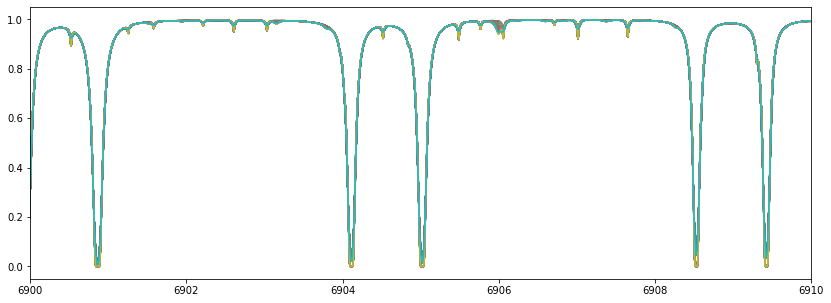

In [7]:
plt.figure(figsize=(14,5))

for h2o in h2o_grid:
    th2o = h2o
    
    
    if (h2o ==38):
        th2o=36.5
    if (h2o ==40):
        th2o=37.1
    if (h2o ==42):
        th2o=44.2
    if (h2o ==44):
        th2o=45.        
              
        
        
        
    for o2 in o2_grid:

        # EXTRA '_' for reading purposes
        outname = DEIMOS_DROPBOX + '/templates/fine_tellurics/telluric_0.02A_h2o_{}_o2_{:2.2f}_.fits'.format(int(h2o),o2)

        print(h2o,o2)
        
        twave = wave_deimos
        if not os.path.isfile(outname):
            tflux = run_telfit(th2o,o2)
            print(outname)

            t = Table([twave,tflux], names=('wave', 'flux'))
            t.meta['h2o'] = h2o
            t.meta['o2']  = o2

            t.write(outname, format='fits')

In [ ]:
clr = ['blue','red']
o2_val  = 1.e5 * np.array([0.7,2.0])
h2o_val = np.array([2,98])
losvd_pix = 0.5/0.01

for h2o in h2o_val:
    
    plt.figure(figsize=(16,5))
    for o2,c in zip(o2_val,clr):
        tfile = DEIMOS_DROPBOX + '/templates/fine_tellurics/telluric_0.02A_h2o_{}_o2_{:2.2f}_.fits'.format(int(h2o),o2/1.e5)
        
        hdu  = fits.open(tfile)
        data =  hdu[1].data
        twave = np.array(data['wave']).flatten()
        tflux = np.array(data['flux']).flatten()

        cflux = scipynd.gaussian_filter1d(tflux,losvd_pix)#,mode='nearest')
        t = 'o2={:0.2e}   h2o={:0.0f}'.format(o2,h2o)
        plt.plot(twave,cflux,alpha=0.5,label=t,color=c)
        plt.title('Changes in O2')

    plt.legend()
#plt.xlim(8200,8500)

In [ ]:
clr = ['blue','red']

for o2 in o2_val:
    
    plt.figure(figsize=(16,5))
    for h2o,c in zip(h2o_val,clr):
        tfile = DEIMOS_DROPBOX + '/templates/fine_tellurics/telluric_0.02A_h2o_{}_o2_{:2.2f}_.fits'.format(int(h2o),o2/1.e5)
        
        hdu  = fits.open(tfile)
        data =  hdu[1].data
        twave = np.array(data['wave']).flatten()
        tflux = np.array(data['flux']).flatten()

 
        cflux = scipynd.gaussian_filter1d(tflux,losvd_pix)#,mode='nearest')
        plt.plot(twave,cflux,alpha=0.5,color=c)
        t = 'o2={:0.2e}   h2o={:0.0f}'.format(o2,h2o)
        plt.plot(twave,cflux,alpha=0.25,label=t,color=c)
        plt.title('Changes in H2O')
    plt.legend()
   # plt.xlim(8100,8350)